In [ ]:
#importação dos dados 
import pandas as pd

treino = pd.read_csv('/content/treino.csv')
teste = pd.read_csv('/content/teste.csv')

In [ ]:
treino.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cliente
0,Female,0,No,No,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,Normal
1,Female,0,Yes,Yes,59,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,No,Mailed check,Premium
2,Female,0,Yes,Yes,68,No,No phone service,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),Premium
3,Female,0,No,Yes,35,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,Premium
4,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,Normal


In [ ]:
print(treino.shape)
print(teste.shape)

(2500, 18)
(2500, 17)


In [ ]:
##from sklearn.dummy import DummyClassifier

In [ ]:
conjunto = [treino, teste]

for dados in conjunto:
    dados['gender'] = dados['gender'].map({'Male': 0, 'Female': 1})
    dados['Partner'] = dados['Partner'].map({'No': 0, 'Yes': 1})
    dados['Dependents'] = dados['Dependents'].map({'No': 0, 'Yes': 1})
    dados['PhoneService'] = dados['PhoneService'].map({'No': 0, 'Yes': 1})
    dados['PaperlessBilling'] = dados['PaperlessBilling'].map({'No': 0, 'Yes': 1})
treino['Cliente'] = treino['Cliente'].map({'Normal': 0, 'Premium': 1})

In [ ]:
conjunto = [treino, teste]

for dados in conjunto:
    dados['MultipleLines'] = dados['MultipleLines'].map({'No': 0, 'Yes': 1, 'No phone service': 0})
    #dados['InternetService'] = dados['InternetService'].map({'No': 0, 'Yes': 1})
    dados['OnlineSecurity'] = dados['OnlineSecurity'].map({'No': 0, 'Yes': 1, 'No internet service': 0})
    dados['OnlineBackup'] = dados['OnlineBackup'].map({'No': 0, 'Yes': 1, 'No internet service': 0})
    dados['DeviceProtection'] = dados['DeviceProtection'].map({'No': 0, 'Yes': 1, 'No internet service': 0})
    dados['TechSupport'] = dados['TechSupport'].map({'No': 0, 'Yes': 1, 'No internet service': 0})
    dados['StreamingTV'] = dados['StreamingTV'].map({'No': 0, 'Yes': 1, 'No internet service': 0})
    dados['StreamingMovies'] = dados['StreamingMovies'].map({'No': 0, 'Yes': 1, 'No internet service': 0})
    #dados['Contract'] = dados['Contract'].map({'No': 0, 'Yes': 1})
    #dados['PaymentMethod'] = dados['PaymentMethod'].map({'No': 0, 'Yes': 1})

In [ ]:
treino = pd.get_dummies(treino, columns = ['InternetService','Contract','PaymentMethod'], dtype=int)

In [ ]:
teste = pd.get_dummies(teste, columns = ['InternetService','Contract','PaymentMethod'], dtype=int)

In [ ]:
print(treino.dtypes)

gender               int64
SeniorCitizen        int64
Partner              int64
Dependents           int64
tenure               int64
PhoneService         int64
MultipleLines        int64
InternetService     object
OnlineSecurity       int64
OnlineBackup         int64
DeviceProtection     int64
TechSupport          int64
StreamingTV          int64
StreamingMovies      int64
Contract            object
PaperlessBilling     int64
PaymentMethod       object
Cliente              int64
dtype: object


### Modelo de Classificação

In [ ]:
from pycaret.classification import *

In [ ]:
class_setup = setup(data = treino,
                    target = 'Cliente',
                    normalize = True, 
                    ignore_low_variance = True,
                    remove_multicollinearity = True, 
                    multicollinearity_threshold = 0.95,
                    n_jobs = -1)

,Description,Value
0,session_id,6114
1,Target,Cliente
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(2500, 18)"
5,Missing Values,False
6,Numeric Features,1
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [ ]:
todos = compare_models(n_select = 18, turbo = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9834,0.9992,0.9794,0.9855,0.9823,0.9667,0.9668,0.0420
gbc,Gradient Boosting Classifier,0.9783,0.9986,0.9769,0.9770,0.9769,0.9564,0.9565,0.0700
lightgbm,Light Gradient Boosting Machine,0.9771,0.9980,0.9793,0.9725,0.9758,0.9541,0.9543,0.1280
rf,Random Forest Classifier,0.9743,0.9970,0.9720,0.9733,0.9726,0.9483,0.9484,0.0930
dt,Decision Tree Classifier,0.9651,0.9649,0.9600,0.9660,0.9628,0.9300,0.9303,0.0060
lr,Logistic Regression,0.9628,0.9963,0.9539,0.9672,0.9603,0.9254,0.9258,0.0110
svm,SVM - Linear Kernel,0.9571,0.0000,0.9490,0.9607,0.9542,0.9139,0.9150,0.0070
et,Extra Trees Classifier,0.9502,0.9910,0.9418,0.9523,0.9469,0.9001,0.9003,0.0840
ridge,Ridge Classifier,0.9405,0.0000,0.9066,0.9655,0.9349,0.8803,0.8821,0.0090
lda,Linear Discriminant Analysis,0.9405,0.9925,0.9066,0.9655,0.9349,0.8803,0.8821,0.0090


In [ ]:
modelo = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9829,0.9993,0.9756,0.9877,0.9816,0.9656,0.9656
1,0.9886,0.9997,0.9756,1.0000,0.9877,0.9770,0.9773
2,0.9829,0.9992,0.9756,0.9877,0.9816,0.9656,0.9656
3,0.9829,0.9992,0.9878,0.9759,0.9818,0.9656,0.9657
4,0.9886,0.9996,1.0000,0.9762,0.9880,0.9771,0.9773
5,0.9714,0.9983,0.9639,0.9756,0.9697,0.9427,0.9427
6,0.9886,0.9987,0.9880,0.9880,0.9880,0.9771,0.9771
7,0.9886,0.9995,0.9880,0.9880,0.9880,0.9771,0.9771
8,0.9771,0.9987,0.9759,0.9759,0.9759,0.9542,0.9542
9,0.9828,0.9998,0.9634,1.0000,0.9814,0.9653,0.9659


In [ ]:
modelo_tunado = tune_model(modelo, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9829,0.9992,0.9878,0.9759,0.9818,0.9656,0.9657
1,0.9886,0.9992,0.9756,1.0000,0.9877,0.9770,0.9773
2,0.9771,0.9988,0.9756,0.9756,0.9756,0.9541,0.9541
3,0.9886,0.9997,0.9878,0.9878,0.9878,0.9771,0.9771
4,0.9943,0.9997,1.0000,0.9880,0.9939,0.9885,0.9886
5,0.9829,0.9987,0.9759,0.9878,0.9818,0.9656,0.9657
6,0.9829,0.9976,0.9759,0.9878,0.9818,0.9656,0.9657
7,0.9886,0.9996,0.9880,0.9880,0.9880,0.9771,0.9771
8,0.9771,0.9992,0.9759,0.9759,0.9759,0.9542,0.9542
9,0.9828,0.9995,0.9634,1.0000,0.9814,0.9653,0.9659


In [ ]:
top7_tunados = [tune_model(i) for i in todos[:7]]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9600,0.0000,0.9634,0.9518,0.9576,0.9197,0.9198
1,0.9371,0.0000,0.9390,0.9277,0.9333,0.8739,0.8739
2,0.9486,0.0000,0.9390,0.9506,0.9448,0.8967,0.8967
3,0.9771,0.0000,0.9878,0.9643,0.9759,0.9542,0.9544
4,0.9429,0.0000,0.9512,0.9286,0.9398,0.8854,0.8857
5,0.9714,0.0000,0.9639,0.9756,0.9697,0.9427,0.9427
6,0.9486,0.0000,0.9518,0.9405,0.9461,0.8969,0.8970
7,0.9714,0.0000,0.9518,0.9875,0.9693,0.9426,0.9432
8,0.9543,0.0000,0.9518,0.9518,0.9518,0.9083,0.9083
9,0.9540,0.0000,0.9390,0.9625,0.9506,0.9076,0.9079


In [ ]:
top7_tunados

[AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                    n_estimators=200, random_state=6114),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.15, loss='deviance', max_depth=7,
                            max_features=1.0, max_leaf_nodes=None,
                            min_impurity_decrease=0.0002,
                            min_impurity_split=None, min_samples_leaf=3,
                            min_samples_split=5, min_weight_fraction_leaf=0.0,
                            n_estimators=280, n_iter_no_change=None,
                            presort='deprecated', random_state=6114,
                            subsample=0.5, tol=0.0001, validation_fraction=0.1,
                            verbose=0, warm_start=False),
 LGBMClassifier(bagging_fraction=0.5, bagging_freq=2, boosting_type='gbdt',
                class_weight=None, colsample_bytree=1.0, feature_fraction=

In [ ]:
results = pd.DataFrame()

In [ ]:
for i in range(len(top7_tunados)):
    ccc = predict_model(top7_tunados[i])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.9827,0.9982,0.9745,0.9885,0.9815,0.9652,0.9653


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.9760,0.9981,0.9688,0.9799,0.9744,0.9519,0.9519


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9880,0.9991,0.9802,0.9943,0.9872,0.9759,0.9760


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9760,0.9983,0.9773,0.9718,0.9746,0.9519,0.9519


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9747,0.9854,0.9547,0.9912,0.9726,0.9491,0.9497


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9787,0.9983,0.9773,0.9773,0.9773,0.9572,0.9572


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,SVM - Linear Kernel,0.9601,0.9601,0.9603,0.9549,0.9576,0.9198,0.9199


In [ ]:
combinacao_soft = blend_models(top7_tunados, optimize = 'Accuracy', method = 'soft') 
# os sete melhores modelos soltam probabilidades, então posso fazer combinação 'soft'

TypeError: Estimator list contains estimator SGDClassifier(alpha=0.0002, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.5, fit_intercept=True,
              l1_ratio=0.6900000001, learning_rate='invscaling', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=6114, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) that doesn't support probabilities and method is forced to 'soft'. Either change the method or drop the estimator.

In [ ]:
combinacao_hard = blend_models(top7_tunados, method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9771,0.0000,0.9756,0.9756,0.9756,0.9541,0.9541
1,0.9771,0.0000,0.9634,0.9875,0.9753,0.9540,0.9543
2,0.9771,0.0000,0.9756,0.9756,0.9756,0.9541,0.9541
3,0.9886,0.0000,0.9878,0.9878,0.9878,0.9771,0.9771
4,0.9886,0.0000,1.0000,0.9762,0.9880,0.9771,0.9773
5,0.9771,0.0000,0.9639,0.9877,0.9756,0.9541,0.9544
6,0.9829,0.0000,0.9639,1.0000,0.9816,0.9656,0.9661
7,0.9886,0.0000,0.9880,0.9880,0.9880,0.9771,0.9771
8,0.9771,0.0000,0.9759,0.9759,0.9759,0.9542,0.9542
9,0.9655,0.0000,0.9512,0.9750,0.9630,0.9307,0.9310


In [ ]:
preds = predict_model(combinacao_hard, data = treino)

In [ ]:
preds.sample(20).sort_values(by = 'Cliente')

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cliente,Label
473,1,0,0,0,12,1,1,DSL,1,0,1,1,0,0,Month-to-month,1,Mailed check,0,0
391,1,0,0,0,33,1,1,No,0,0,0,0,0,0,Two year,0,Credit card (automatic),0,0
942,1,0,0,0,8,1,0,No,0,0,0,0,0,0,One year,1,Mailed check,0,0
1431,0,0,1,0,70,1,0,No,0,0,0,0,0,0,Two year,0,Credit card (automatic),0,0
1837,1,0,0,1,9,1,0,Fiber optic,1,0,1,1,0,1,Month-to-month,0,Bank transfer (automatic),0,0
1008,0,0,1,0,1,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),0,0
2317,1,1,0,0,1,1,0,Fiber optic,0,0,0,0,1,0,Month-to-month,0,Electronic check,0,0
877,1,1,0,0,14,0,0,DSL,1,0,1,1,0,0,Two year,0,Mailed check,0,0
983,1,1,1,0,5,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,0,0
435,1,0,0,0,2,1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,0,0


In [ ]:
plot_model(combinacao_hard)

TypeError: AUC plot not available for estimators with no predict_proba attribute.

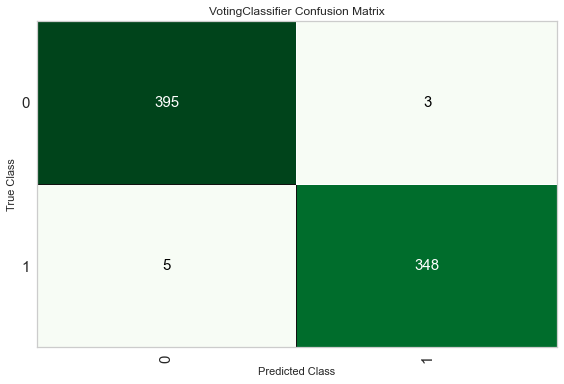

In [ ]:
plot_model(combinacao_hard, plot = 'confusion_matrix')

In [ ]:
pred = predict_model(combinacao_hard)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9893,0.9891,0.9858,0.9915,0.9886,0.9786,0.9786


In [ ]:
pred = predict_model(combinacao_hard, data = teste)
pred

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Label
0,1,0,1,1,23,1,0,No,0,0,0,0,0,0,One year,0,Mailed check,0
1,1,0,0,0,27,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,0
2,0,0,0,0,2,1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,0
3,1,0,0,0,48,1,0,Fiber optic,1,0,1,1,1,1,Two year,1,Credit card (automatic),1
4,0,0,1,0,71,1,0,Fiber optic,0,1,1,1,1,1,Two year,1,Electronic check,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,1,0,1,1,72,1,1,DSL,1,1,1,1,1,1,Two year,0,Credit card (automatic),1
2496,1,0,1,1,1,1,0,DSL,0,0,1,0,0,0,Month-to-month,0,Mailed check,0
2497,0,1,0,0,2,1,0,Fiber optic,0,1,0,0,0,0,Month-to-month,1,Electronic check,0
2498,0,0,0,0,71,1,0,No,0,0,0,0,0,0,Two year,1,Credit card (automatic),0


In [ ]:
pred['Label']

0       0
1       0
2       0
3       1
4       1
       ..
2495    1
2496    0
2497    0
2498    0
2499    1
Name: Label, Length: 2500, dtype: int32

In [ ]:
subm = pd.DataFrame()
subm['Cliente'] = pred['Label']

In [ ]:
subm

,Cliente
0,0
1,0
2,0
3,1
4,1
...,...
2495,1
2496,0
2497,0
2498,0


In [ ]:
subm.to_csv('submissão2.csv', index = False)